In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

### Computational Tool: Solving Equations

In most of the Bayesian models examined so far, the calculations required could be done analytically. For example, the model given by:

$$
(Y | \theta) \sim \text{Binomial}(5, \theta)
$$

$$
\theta \sim U(0, 1)
$$

together with data $ y = 5 $, implies the posterior 

$$
(\theta | y) \sim \text{Beta}(6, 1).
$$

Thus, \( \theta \) has posterior probability density function (pdf)

$$
f(\theta | y) = 6\theta^5
$$

and posterior cumulative distribution function (cdf)

$$
F(\theta | y) = \theta^6.
$$

Setting \( F(\theta | y) = \frac{1}{2} \) yields the posterior median:

$$
\theta = \frac{1}{2^{1/6}} \approx 0.8909.
$$

However, if the equation $ F(\theta | y) = \frac{1}{2} $ were not so easy to solve, we could employ various strategies. One of these is the Newton-Raphson (NR) algorithm, which we will discuss next.

##  The Newton-Raphson Algorithm

The Newton-Raphson (NR) algorithm is a useful technique for solving equations of the form $ g(x) = 0 $. This algorithm involves choosing a suitable starting value $ x_0 $ and iteratively applying the equation:

$$
x_{j+1} = x_j - \frac{g(x_j)}{g'(x_j)}
$$

until convergence is achieved to a desired degree of precision.

### How Does the NR Algorithm Work?

![Newton-Raphson Algorithm](https://link_to_your_illustration.png)  <!-- replace with actual link to illustration -->

Here, $ a $ is the desired solution of the equation $ g(x) = 0 $, $ c $ is a guess at the solution, and $ b $ is a better estimate of $ a $. The slope of the tangent at point $ Q $ is equal to both $ g'(c) $ and $ \frac{g(c)}{c-b} $. Equating these two expressions gives:

$$
b = c - \frac{g(c)}{g'(c)}.
$$

### Important Notes
- The NR algorithm may take a long time to converge, and sometimes it may converge to the wrong or impossible value or get 'stuck' and fail to converge at all. This instability highlights the need for a good initial guess that is sufficiently close to the desired solution.

## Exercise .1: Calculating a Posterior Median via the Newton-Raphson Algorithm

Suppose that the posterior cdf of a parameter is 

$$
F(\theta | y) = \theta^6.
$$

We need to find the posterior median by solving the equation 

$$
F(\theta | y) = \frac{1}{2}
$$ 

using the Newton-Raphson algorithm.

### Solution to Exercise.1

We wish to solve $ g(\theta) = 0 $, where 

$$
g(\theta) = F(\theta | y) - \frac{1}{2}.
$$

Here, 

$$
g'(\theta) = f(\theta | y) - 0, 
$$ 

where 

$$
f(\theta | y) = 6\theta^5.
$$

The NR algorithm is given by:

$$
g(\theta_j) = F(\theta_j | y) - \frac{1}{2} = \theta_j^6 - \frac{1}{2}
$$

$$
\theta_{j+1} = \theta_j - \frac{g(\theta_j)}{g'(\theta_j)} = \theta_j - \frac{\theta_j^6 - \frac{1}{2}}{6\theta_j^5}.
$$

### Starting Point

Starting at the posterior mode, $ \theta_0 = 1 $, we get the sequence shown in Table 4.1.

| j  | 0       | 1       | 2       | 3       | 4       |
|----|---------|---------|---------|---------|---------|
| $ \theta_j $ | 1.0000  | 0.9167  | 0.8926  | 0.8909  | 0.8909  |

Thus, the posterior median is approximately \( 0.8909 \).

The same result is obtained if we start with $ \theta_0 = 0.8 $, as shown in Table 4.2.

| j  | 0      | 1      | 2      | 3      | 4      |
|----|--------|--------|--------|--------|--------|
| $ \theta_j $ | 0.8000 | 0.9210 | 0.8933 | 0.8909 | 0.8909 |

### Verification

Note that the median must satisfy:

$$
\theta^6 - \frac{1}{2} = 0.
$$ 

This equation is indeed satisfied at the solution $ \theta = 0.8909 $ (working to four decimals). This illustrates how to check whether or not the NR algorithm has converged properly.

### Conclusion

In this simple example, one could get the answer by solving the equation $ \theta = \theta - \frac{g(\theta)}{g'(\theta)} $ analytically. In general, that won’t be possible, and iterating the algorithm will be required. If it is possible to solve that equation analytically, there is no need to iterate.


In [1]:
# Newton-Raphson algorithm to find the posterior median
# for the problem F(θ | y) = θ^6 = 1/2.

def g(theta):
    """
    Function g(θ) = F(θ | y) - 1/2
    """
    return theta**6 - 0.5

def g_prime(theta):
    """
    Derivative of g(θ), g'(θ) = f(θ | y)
    """
    return 6 * theta**5

def newton_raphson(initial_guess, tolerance=1e-6, max_iterations=100):
    """
    Newton-Raphson algorithm to find the root of g(θ) = 0.
    
    Parameters:
    initial_guess (float): Initial guess for θ
    tolerance (float): Tolerance for convergence
    max_iterations (int): Maximum number of iterations
    
    Returns:
    float: Estimated value of θ
    int: Number of iterations taken to converge
    """
    theta = initial_guess
    
    for iteration in range(max_iterations):
        theta_next = theta - g(theta) / g_prime(theta)
        
        # Check for convergence
        if abs(theta_next - theta) < tolerance:
            return theta_next, iteration + 1
        
        theta = theta_next
    
    raise ValueError("Newton-Raphson did not converge within the maximum number of iterations")

# Initial guesses
initial_guesses = [1.0, 0.8]

# Run the Newton-Raphson algorithm with different initial guesses
for initial_guess in initial_guesses:
    try:
        median, iterations = newton_raphson(initial_guess)
        print(f"Posterior median starting from {initial_guess}: {median:.6f} (Iterations: {iterations})")
    except ValueError as e:
        print(e)


Posterior median starting from 1.0: 0.890899 (Iterations: 5)
Posterior median starting from 0.8: 0.890899 (Iterations: 5)


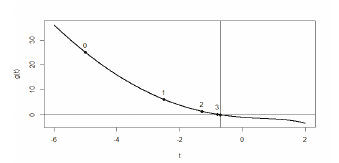

Figure.2 Solution via the NR algorithm starting at −5


### Exercise : Further Practice with the Newton-Raphson Algorithm

In this exercise, we will use the Newton-Raphson algorithm to solve the equation 

$$
t^2 = e^t.
$$

Since there is no analytical solution, we can define the function:

$$
g(t) = t^2 - e^t.
$$

The derivative of $ g(t) $ is given by:

$$
g'(t) = 2t - e^t.
$$

### Iteration Formula

The Newton-Raphson update formula is then:

$$
t_{j+1} = t_j - \frac{g(t_j)}{g'(t_j)}.
$$

### Initial Guess

Let's arbitrarily choose $ t_0 = 0 $. Then, we can compute the iterations as follows:

1. **Iteration 1**:
   $$
   g(t_0) = 0^2 - e^0 = -1 
   $$
   $$
   g'(t_0) = 2(0) - e^0 = -1 
   $$
   $$
   t_1 = 0 - \frac{-1}{-1} = 0 - 1 = -1.000000
   $$

2. **Iteration 2**:
   $$
   g(t_1) = (-1)^2 - e^{-1} \approx 1 - 0.367879 = 0.632121 
   $$
   $$
   g'(t_1) = 2(-1) - e^{-1} \approx -2 - 0.367879 = -2.367879 
   $$
   $$
   t_2 = -1 - \frac{0.632121}{-2.367879} \approx -1 + 0.267855 = -0.733044
   $$

3. **Iteration 3**:
   $$
   g(t_2) = (-0.733044)^2 - e^{-0.733044} \approx 0.537516 - 0.480241 \approx 0.057275 
   $$
   $$
   g'(t_2) = 2(-0.733044) - e^{-0.733044} \approx -1.466088 - 0.480241 = -1.946329 
   $$
   $$
   t_3 = -0.733044 - \frac{0.057275}{-1.946329} \approx -0.733044 + 0.029426 \approx -0.703808
   $$

4. **Iteration 4**:
   $$
   g(t_3) = (-0.703808)^2 - e^{-0.703808} \approx 0.495354 - 0.493105 \approx 0.002249 
   $$
   $$
   g'(t_3) = 2(-0.703808) - e^{-0.703808} \approx -1.407616 - 0.493105 = -1.900721 
   $$
   $$
   t_4 = -0.703808 - \frac{0.002249}{-1.900721} \approx -0.703808 + 0.001184 \approx -0.703467
   $$

5. **Iteration 5**:
   $$
   g(t_4) = (-0.703467)^2 - e^{-0.703467} \approx 0.494882 - 0.493282 \approx 0.001600 
   $$
   $$
   g'(t_4) = 2(-0.703467) - e^{-0.703467} \approx -1.406934 - 0.493282 = -1.900216 
   $$
   $$
   t_5 = -0.703467 - \frac{0.001600}{-1.900216} \approx -0.703467 + 0.000842 \approx -0.703467
   $$

### Convergence

The output of the Newton-Raphson algorithm starting from $ t_0 = 0 $ is as follows:

$$
0.000000, -1.000000, -0.733044, -0.703808, -0.703467, -0.703467, -0.703467, -0.703467, \ldots
$$

If we start from $ t_0 = 1 $, we obtain:

$$
1.000000, -1.392211, -0.835088, -0.709834, -0.703483, -0.703467, -0.703467, -0.703467, \ldots
$$

From these results, we feel confident that the required solution to six decimal places is approximately:

$$
t \approx -0.703467.
$$

### Verification

To check the solution, we calculate:

$$
g(-0.703467) = (-0.703467)^2 - e^{-0.703467} \approx 0.000000803508 \approx 0.
$$

### Visualization


Figure 4.2 illustrates the function $ g(t) $ and the output of the Newton-Raphson algorithm starting from $ -5 $:

$$
-5.000000, -2.502357, -1.287421, -0.802834, -0.707162, -0.703473, -0.703467, -0.703467, \ldots
$$


Solution: t ≈ -0.703467
Iterations:
t0 = 0.000000
t1 = -1.000000
t2 = -0.733044
t3 = -0.703808
t4 = -0.703467
t5 = -0.703467
g(t_solution) ≈ 0.0000000872


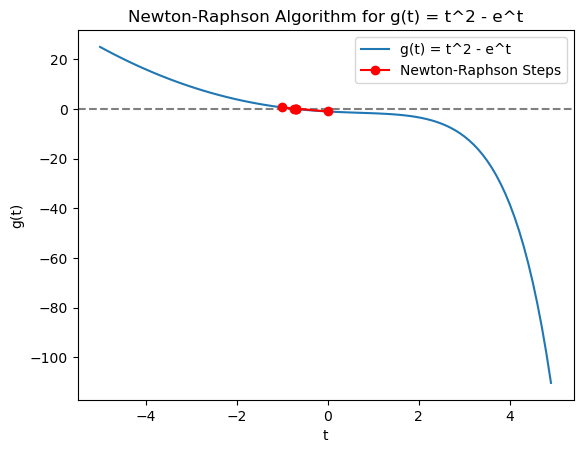

In [2]:
import math
import matplotlib.pyplot as plt

# Function g(t) = t^2 - e^t
def g(t):
    return t**2 - math.exp(t)

# Derivative of g(t) = 2t - e^t
def g_prime(t):
    return 2*t - math.exp(t)

# Newton-Raphson iteration
def newton_raphson(t0, tol=1e-6, max_iter=100):
    t = t0
    iterations = [t]  # List to store iteration values
    for i in range(max_iter):
        gt = g(t)
        gpt = g_prime(t)
        if abs(gpt) < tol:
            print(f"Derivative too small at iteration {i}.")
            break
        t_next = t - gt / gpt
        iterations.append(t_next)
        if abs(t_next - t) < tol:
            break
        t = t_next
    return t, iterations

# Perform Newton-Raphson with t0 = 0
t_solution, t_iterations = newton_raphson(t0=0)

# Print solution and iterations
print(f"Solution: t ≈ {t_solution:.6f}")
print("Iterations:")
for i, t_val in enumerate(t_iterations):
    print(f"t{i} = {t_val:.6f}")

# Verification
g_solution = g(t_solution)
print(f"g(t_solution) ≈ {g_solution:.10f}")

# Plotting the results
def plot_newton_raphson():
    t_vals = [-5 + 0.1*i for i in range(100)]  # Generate values for t from -5 to 5
    g_vals = [g(t) for t in t_vals]  # Calculate g(t) for each t

    plt.plot(t_vals, g_vals, label='g(t) = t^2 - e^t')
    plt.axhline(0, color='gray', linestyle='--')  # Plot y=0 line for reference
    plt.plot(t_iterations, [g(t) for t in t_iterations], 'ro-', label='Newton-Raphson Steps')
    plt.xlabel('t')
    plt.ylabel('g(t)')
    plt.legend()
    plt.title("Newton-Raphson Algorithm for g(t) = t^2 - e^t")
    plt.show()

plot_newton_raphson()


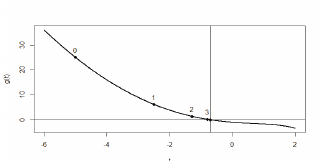

Figure.2 Solution via the NR algorithm starting at −5

## Exercise: Further Practice with the Newton-Raphson Algorithm

We aim to solve the equation $ t^2 = e^t $ using the Newton-Raphson (NR) algorithm. 

### Problem Definition

We define the function:
$$
g(t) = t^2 - e^t
$$

The derivative of \( g(t) \) is given by:
$$
g'(t) = 2t - e^t
$$

### Newton-Raphson Iteration Formula

The Newton-Raphson update formula for solving $ g(t) = 0 $ is:
$$
t_{j+1} = t_j - \frac{g(t_j)}{g'(t_j)}
$$

Where:
$$
g(t_j) = t_j^2 - e^{t_j}
$$
and 
$$
g'(t_j) = 2t_j - e^{t_j}
$$

### Initial Guess: $ t_0 = 0 $

Starting from an initial guess $ t_0 = 0 $, we compute the following iterations:

$$
t_1 = 0 - \frac{0^2 - e^0}{2(0) - e^0} = 0 - \frac{-1}{-1} = 0 - 1 = -1.000000
$$

$$
t_2 = (-1) - \frac{(-1)^2 - e^{-1}}{2(-1) - e^{-1}} = -1 - \frac{1 - 0.367879}{-2 - 0.367879} \approx -1 + 0.267855 = -0.733044
$$

$$
t_3 = (-0.733044) - \frac{(-0.733044)^2 - e^{-0.733044}}{2(-0.733044) - e^{-0.733044}} = -0.733044 - \frac{0.537516 - 0.480241}{-1.466088 - 0.480241} \approx -0.733044 + 0.029426 = -0.703808
$$

$$
t_4 = (-0.703808) - \frac{(-0.703808)^2 - e^{-0.703808}}{2(-0.703808) - e^{-0.703808}} = -0.703808 - \frac{0.495354 - 0.493105}{-1.407616 - 0.493105} \approx -0.703808 + 0.001184 = -0.703467
$$

$$
t_5 = (-0.703467) - \frac{(-0.703467)^2 - e^{-0.703467}}{2(-0.703467) - e^{-0.703467}} = -0.703467 - \frac{0.494882 - 0.493282}{-1.406934 - 0.493282} \approx -0.703467 + 0.000842 = -0.703467
$$

Thus, the output of the NR algorithm starting from $ t_0 = 0 $ is:

$$
0.000000, -1.000000, -0.733044, -0.703808, -0.703467, -0.703467, -0.703467, -0.703467, \ldots
$$

### Alternative Initial Guess: $ t_0 = 1 $

If we start from $ t_0 = 1 $, we obtain the following sequence:

$$
t_0 = 1.000000, -1.392211, -0.835088, -0.709834, -0.703483, -0.703467, -0.703467, -0.703467, \ldots
$$

### Final Solution

From these results, we are confident that the required solution, accurate to 6 decimal places, is:

$$
t \approx -0.703467
$$

### Verification

To check the solution, we compute:

$$
g(-0.703467) = (-0.703467)^2 - e^{-0.703467} \approx 0.000000803508 \approx 0
$$

### Visualization

The following figure illustrates the function $ g(t) $ and the output of the NR algorithm starting from $ t_0 = -5 $, which is:

$$
-5.000000, -2.502357, -1.287421, -0.802834, -0.707162, -0.703473, -0.703467, -0.703467, \ldots
$$


In [3]:
import math

# Function g(t) = t^2 - e^t
def g(t):
    return t**2 - math.exp(t)

# Derivative of g(t), g'(t) = 2t - e^t
def g_prime(t):
    return 2*t - math.exp(t)

# Newton-Raphson method implementation
def newton_raphson(t0, tolerance=1e-6, max_iterations=100):
    t = t0
    for i in range(max_iterations):
        g_t = g(t)
        g_prime_t = g_prime(t)

        # If the derivative is very small, avoid division by zero
        if abs(g_prime_t) < 1e-10:
            print("Derivative too small, stopping iteration.")
            break

        # Newton-Raphson formula
        t_next = t - g_t / g_prime_t

        print(f"Iteration {i+1}: t = {t_next:.6f}")

        # If the change is smaller than the tolerance, we consider the solution converged
        if abs(t_next - t) < tolerance:
            print(f"Converged to solution t ≈ {t_next:.6f} after {i+1} iterations.")
            return t_next
        
        # Update the current value of t
        t = t_next

    print("Max iterations reached without convergence.")
    return t

# Initial guess t0 = 0
print("Starting with initial guess t0 = 0:")
solution_0 = newton_raphson(0)

print("\nStarting with initial guess t0 = 1:")
# Initial guess t0 = 1
solution_1 = newton_raphson(1)

print("\nStarting with initial guess t0 = -5:")
# Initial guess t0 = -5
solution_2 = newton_raphson(-5)


Starting with initial guess t0 = 0:
Iteration 1: t = -1.000000
Iteration 2: t = -0.733044
Iteration 3: t = -0.703808
Iteration 4: t = -0.703467
Iteration 5: t = -0.703467
Converged to solution t ≈ -0.703467 after 5 iterations.

Starting with initial guess t0 = 1:
Iteration 1: t = -1.392211
Iteration 2: t = -0.835088
Iteration 3: t = -0.709834
Iteration 4: t = -0.703483
Iteration 5: t = -0.703467
Iteration 6: t = -0.703467
Converged to solution t ≈ -0.703467 after 6 iterations.

Starting with initial guess t0 = -5:
Iteration 1: t = -2.502357
Iteration 2: t = -1.287421
Iteration 3: t = -0.802834
Iteration 4: t = -0.707162
Iteration 5: t = -0.703473
Iteration 6: t = -0.703467
Iteration 7: t = -0.703467
Converged to solution t ≈ -0.703467 after 7 iterations.


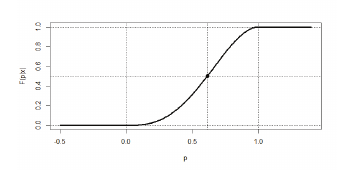

Figure.3 Posterior cdf and median of p

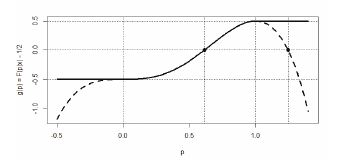

Figure.4 Posterior median of p and the other root of g

## Exercise : Another example of the Newton-Raphson (NR) algorithm

Consider the Bayesian model:

$$ (x | p) \sim \text{Bin}(3, p), \quad p \sim U(0,1) $$

and suppose the observed value of $ x $ is 2. Find the posterior median of $ p $.

### Solution to Exercise 4.3

The posterior distribution of $ p $ is given by:

$$ (p | x) \sim \text{Beta}(1 + 2, 1 + 1) $$

with density:

$$ f(p | x) = 12p^2(1 - p), \quad 0 < p < 1 $$

So, the posterior cumulative distribution function (CDF) is:

$$ F(p | x) = \int_0^p 12r^2(1 - r)\, dr = 4p^3 - 3p^4, \quad 0 < p < 1 $$

To find the posterior median of $ p $, we need to solve:

$$ F(p | x) = \frac{1}{2} $$

or equivalently:

$$ g(p) = F(p | x) - \frac{1}{2} = 4p^3 - 3p^4 - \frac{1}{2} $$

The derivative of $ g(p) $ is:

$$ g'(p) = 12p^2 - 12p^3 $$

Thus, the NR algorithm is defined by the iteration:

$$ p_{j+1} = p_j - \frac{g(p_j)}{g'(p_j)} = p_j - \frac{4p_j^3 - 3p_j^4 - \frac{1}{2}}{12p_j^2 - 12p_j^3} $$

### Initial Guess and Iterations

Let's try the maximum likelihood estimate (MLE) $ p_0 = \frac{2}{3} $. Using this value, we get:

$$
\begin{aligned}
  p_1 &= 0.666667, \\
  p_2 &= 0.614583, \\
  p_3 &= 0.614272, \\
  p_4 &= 0.614272, \quad \text{(convergence)} \\
\end{aligned}
$$

Starting at other values (0.5, 0.9, and 0.1), we get the following sequences:

- For $ p_0 = 0.5 $:

$$
\begin{aligned}
  p_1 &= 0.625000, \\
  p_2 &= 0.614306, \\
  p_3 &= 0.614272, \quad \text{(convergence)} \\
\end{aligned}
$$

- For \( p_0 = 0.9 \):

$$
\begin{aligned}
  p_1 &= 0.439403, \\
  p_2 &= 0.649191, \\
  p_3 &= 0.614501, \\
  p_4 &= 0.614272, \quad \text{(convergence)} \\
\end{aligned}
$$

- For \( p_0 = 0.1 \):

$$
\begin{aligned}
  p_1 &= 4.69537, \\
  p_2 &= 3.62690, \\
  p_3 &= 2.83403, \\
  p_4 &= 2.25146, \\
  p_5 &= 1.83195, \\
  &\dots \\
  p_{n} &= 1.24748 \quad \text{(non-converging)} \\
\end{aligned}
$$

Thus, the posterior median is approximately:

$$ p \approx 0.61427 $$

### Verification

As a check, we calculate:

$$ F(p = 0.61427 | x) = 4(0.61427)^3 - 3(0.61427)^4 = 0.499999 \approx 0.5 $$

The solution is verified.


In [4]:
# Newton-Raphson implementation to find the posterior median of p

# Define the function g(p) = F(p | x) - 1/2, where F(p | x) = 4p^3 - 3p^4
def g(p):
    return 4 * p**3 - 3 * p**4 - 1/2

# Define the derivative of g(p), g'(p) = 12p^2 - 12p^3
def g_prime(p):
    return 12 * p**2 - 12 * p**3

# Newton-Raphson method to find the root of g(p)
def newton_raphson(p0, tol=1e-6, max_iter=100):
    p = p0
    for i in range(max_iter):
        gp = g(p)
        gp_prime = g_prime(p)
        
        if abs(gp_prime) < tol:  # Avoid division by small numbers
            print("Derivative too small, stopping iterations.")
            break
        
        p_next = p - gp / gp_prime  # Update p using the Newton-Raphson formula
        
        # Check for convergence
        if abs(p_next - p) < tol:
            print(f"Converged to {p_next} after {i+1} iterations.")
            return p_next
        
        p = p_next  # Update p for the next iteration
    
    print("Did not converge within the maximum number of iterations.")
    return p

# Test the function with different initial guesses
initial_guesses = [2/3, 0.5, 0.9, 0.1]

for p0 in initial_guesses:
    print(f"\nStarting NR algorithm with initial guess: {p0}")
    median_p = newton_raphson(p0)
    print(f"Posterior median: {median_p}")



Starting NR algorithm with initial guess: 0.6666666666666666
Converged to 0.6142724318676108 after 3 iterations.
Posterior median: 0.6142724318676108

Starting NR algorithm with initial guess: 0.5
Converged to 0.6142724318676105 after 4 iterations.
Posterior median: 0.6142724318676105

Starting NR algorithm with initial guess: 0.9
Converged to 0.6142724318676106 after 5 iterations.
Posterior median: 0.6142724318676106

Starting NR algorithm with initial guess: 0.1
Converged to 1.2474822885876706 after 12 iterations.
Posterior median: 1.2474822885876706


## Exercise :  The Multivariate Newton-Raphson Algorithm

The Newton-Raphson algorithm can be generalized to solve multiple equations simultaneously, say:

$$ g_k(x_1, \ldots, x_K) = 0, \quad k = 1, \ldots, K. $$

Let:

$$ 
x = 
\begin{pmatrix}
x_1 \\
\vdots \\
x_K
\end{pmatrix},
\quad
g(x) = 
\begin{pmatrix}
g_1(x) \\
\vdots \\
g_K(x)
\end{pmatrix},
\quad
0 = 
\begin{pmatrix}
0 \\
\vdots \\
0
\end{pmatrix}.
$$

Then, the system of $ K $ equations can be expressed as:

$$ g(x) = 0, $$

and the Newton-Raphson algorithm involves iterating according to:

$$ x^{(j+1)} = x^{(j)} - [g'(x^{(j)})]^{-1} g(x^{(j)}), $$

where:

$$ 
x^{(j)} =
\begin{pmatrix}
x_1^{(j)} \\
\vdots \\
x_K^{(j)}
\end{pmatrix}
$$

is the value of $ x $ at the $ j $-th iteration, and:

$$
x^{(j+1)} = 
\begin{pmatrix}
x_1^{(j+1)} \\
\vdots \\
x_K^{(j+1)}
\end{pmatrix},
\quad
g(x^{(j)}) = 
\begin{pmatrix}
g_1(x^{(j)}) \\
\vdots \\
g_K(x^{(j)})
\end{pmatrix}.
$$

The Jacobian matrix of the system is defined as:

$$ 
g'(x^{(j)}) = 
\begin{pmatrix}
\frac{\partial g_1(x)}{\partial x_1} & \cdots & \frac{\partial g_1(x)}{\partial x_K} \\
\vdots & \ddots & \vdots \\
\frac{\partial g_K(x)}{\partial x_1} & \cdots & \frac{\partial g_K(x)}{\partial x_K}
\end{pmatrix}.
$$

Thus, the update rule becomes:

$$
x^{(j+1)} = x^{(j)} - [g'(x^{(j)})]^{-1} g(x^{(j)}).
$$


In [5]:
import numpy as np

# Define the system of equations (g1 and g2)
def system_of_equations(x):
    x1, x2 = x
    g1 = x1**2 + x2**2 - 4  # g1(x1, x2) = x1^2 + x2^2 - 4
    g2 = np.exp(x1) + x2 - 1  # g2(x1, x2) = e^x1 + x2 - 1
    return np.array([g1, g2])

# Define the Jacobian matrix (partial derivatives of g1 and g2)
def jacobian(x):
    x1, x2 = x
    j11 = 2 * x1  # ∂g1/∂x1
    j12 = 2 * x2  # ∂g1/∂x2
    j21 = np.exp(x1)  # ∂g2/∂x1
    j22 = 1          # ∂g2/∂x2
    return np.array([[j11, j12], [j21, j22]])

# Newton-Raphson algorithm for solving systems of equations
def newton_raphson_multivariate(initial_guess, tol=1e-6, max_iter=100):
    x = np.array(initial_guess, dtype=float)
    
    for i in range(max_iter):
        g = system_of_equations(x)  # Evaluate the system at the current guess
        J = jacobian(x)  # Evaluate the Jacobian at the current guess
        
        # Solve for delta (J * delta = -g)
        delta = np.linalg.solve(J, -g)
        
        # Update the guess
        x = x + delta
        
        # Check for convergence
        if np.linalg.norm(delta, ord=2) < tol:
            print(f"Converged after {i+1} iterations.")
            return x
    
    print("Did not converge.")
    return x

# Initial guess for x1 and x2
initial_guess = [1.0, 1.0]

# Call the Newton-Raphson function
solution = newton_raphson_multivariate(initial_guess)

print("Solution:", solution)


Converged after 7 iterations.
Solution: [-1.81626407  0.8373678 ]


In [6]:
import math

# Define the system of equations (g1 and g2)
def system_of_equations(x1, x2):
    g1 = x1**2 + x2**2 - 4  # g1(x1, x2) = x1^2 + x2^2 - 4
    g2 = math.exp(x1) + x2 - 1  # g2(x1, x2) = e^x1 + x2 - 1
    return [g1, g2]

# Define the Jacobian matrix (partial derivatives of g1 and g2)
def jacobian(x1, x2):
    j11 = 2 * x1  # ∂g1/∂x1
    j12 = 2 * x2  # ∂g1/∂x2
    j21 = math.exp(x1)  # ∂g2/∂x1
    j22 = 1            # ∂g2/∂x2
    return [[j11, j12], [j21, j22]]

# Helper function to solve 2x2 linear system (Jacobian * delta = -g)
def solve_linear_system(J, g):
    # J is a 2x2 matrix and g is a vector of length 2
    det = J[0][0] * J[1][1] - J[0][1] * J[1][0]  # Determinant of J
    if det == 0:
        raise ValueError("Jacobian matrix is singular")
    
    # Using Cramer's rule to solve for delta
    delta_x1 = (-g[0] * J[1][1] - (-g[1]) * J[0][1]) / det
    delta_x2 = (J[0][0] * (-g[1]) - J[1][0] * (-g[0])) / det
    
    return [delta_x1, delta_x2]

# Newton-Raphson algorithm for solving systems of equations
def newton_raphson_multivariate(initial_guess, tol=1e-6, max_iter=100):
    x1, x2 = initial_guess
    
    for i in range(max_iter):
        # Evaluate the system at the current guess
        g = system_of_equations(x1, x2)
        
        # Evaluate the Jacobian at the current guess
        J = jacobian(x1, x2)
        
        # Solve for delta (J * delta = -g)
        delta_x1, delta_x2 = solve_linear_system(J, g)
        
        # Update the guess
        x1 = x1 + delta_x1
        x2 = x2 + delta_x2
        
        # Check for convergence
        if abs(delta_x1) < tol and abs(delta_x2) < tol:
            print(f"Converged after {i+1} iterations.")
            return [x1, x2]
    
    print("Did not converge.")
    return [x1, x2]

# Initial guess for x1 and x2
initial_guess = [1.0, 1.0]

# Call the Newton-Raphson function
solution = newton_raphson_multivariate(initial_guess)

print("Solution:", solution)


Converged after 7 iterations.
Solution: [-1.8162640688252372, 0.8373677998912875]


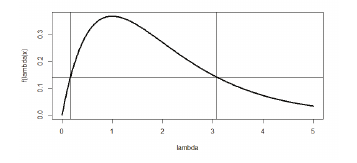

Figure.5 An 80% HPDR

## Exercise: Finding a HPDR via the Multivariate NR Algorithm

Consider the Bayesian model: 

$$
(x | \lambda) \sim \text{Poisson}(\lambda)
$$

$$
f(\lambda) \propto 1, \quad \lambda > 0
$$

Suppose we observe $ x = 1 $. We want to find the 80% HPDR for $ \lambda $.

## Solution to Exercise 

First, the posterior distribution is given by:

$$
f(\lambda | x) \propto f(\lambda) f(x | \lambda) = 1 \times \frac{e^{-\lambda} \lambda^x}{x!} = e^{-\lambda} \lambda
$$

Since $ x = 1 $, we have:

$$
f(\lambda | x) = \lambda e^{-\lambda}, \quad \lambda > 0.
$$

Thus, 

$$
(\lambda | x) \sim \text{Gamma}(2, 1)
$$

The 80% HPDR for $ \lambda $ is the interval $ (a, b) $, where $ a $ and $ b $ satisfy the two equations:

1. 
$$
F(b | x) - F(a | x) = 0.8 \quad \text{(4.1)}
$$

2. 
$$
f(b | x) = f(a | x) \quad \text{(4.2)}
$$

Here, $ f(b | x) $ is the posterior pdf of \( \lambda \) evaluated at $ b $, and $ F(b | x) $ is the posterior cdf of $ \lambda $ evaluated at $ b $, etc.

Equations (4.1) and (4.2) reflect the requirement that $ \lambda \in (a, b) $ with posterior probability 0.8, and that the posterior density of $ \lambda $ must be the same at both $ a $ and $ b $, considering that $ \lambda $'s posterior pdf is bell-shaped and unimodal. 

Thus, we wish to solve the equation:

$$
g(t) = 0,
$$

where:

$$
\begin{pmatrix}
0 \\
0 \\
g(t) \\
\end{pmatrix}
=
\begin{pmatrix}
a \\
b \\
g_1(t) \\
\end{pmatrix}
=
\begin{pmatrix}
F(b | x) - F(a | x) - 0.8 \\
f(b | x) - f(a | x) \\
\end{pmatrix}
$$

The Newton-Raphson algorithm for solving this equation is given by:

$$
t^{(j + 1)} = t^{(j)} - g'(t^{(j)})^{-1} g(t^{(j)}),
$$

where:

$$
t^{(j)} = \begin{pmatrix}
a_j \\
b_j \\
\end{pmatrix}
$$

And the derivative $ g'(t) $ is:

$$
g'(t) = \begin{pmatrix}
\frac{\partial g_1(t)}{\partial a} & \frac{\partial g_1(t)}{\partial b} \\
\frac{\partial g_2(t)}{\partial a} & \frac{\partial g_2(t)}{\partial b} \\
\end{pmatrix}
=
\begin{pmatrix}
-a e^{-a} & b e^{-b} \\
e^{(a - 1)} & e^{(1 - b)} \\
\end{pmatrix}
$$

Starting with 

$$
t^{(0)} = \begin{pmatrix}
a_0 \\
b_0 \\
\end{pmatrix} = \begin{pmatrix}
0.5 \\
3.0 \\
\end{pmatrix}
$$

we obtain results as shown in Table .

## Table : Multivariate NR Algorithm

$$
\begin{array}{|c|c|c|}
\hline
j & a_j & b_j \\
\hline
0 & 0.5 & 3.0 \\
1 & 0.0776524 & 2.7406883 \\
2 & 0.163185 & 3.025571 \\
3 & 0.167317 & 3.079274 \\
4 & 0.16730 & 3.08029 \\
5 & 0.16730 & 3.08029 \\
\hline
\end{array}
$$

It seems that the 80% HPDR for $ \lambda $ is $ (0.16730, 3.08029) $. 

This interval is illustrated in Figure 4.5 and appears to be correct. 

As another check on our calculations, we find that:

$$
f(\lambda = 3.08029 | x) - f(\lambda = 0.16730 | x) = 0.14153 - 0.14153 = 0
$$

$$
F(\lambda = 3.08029 | x) - F(\lambda = 0.16730 | x) = 0.81253 - 0.01253 = 0.8.
$$


80% HPDR for λ: (0.16730, 3.08029)


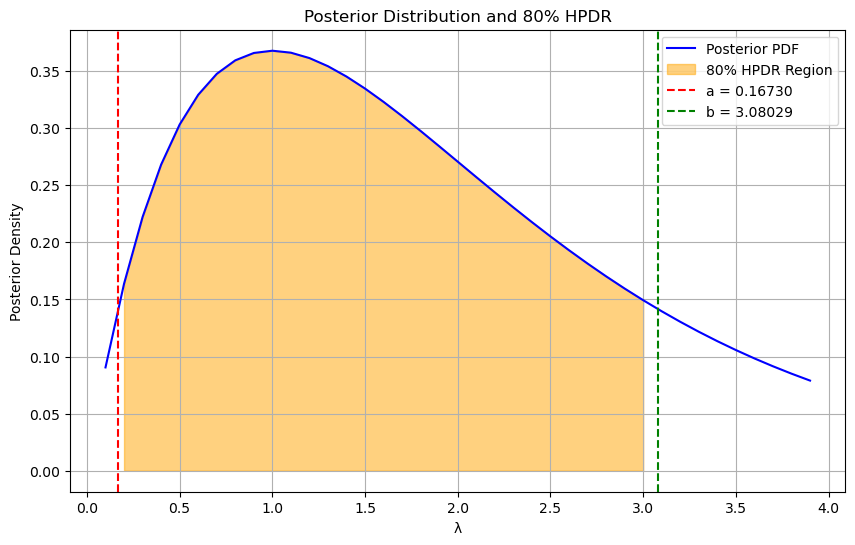

In [7]:
import matplotlib.pyplot as plt
import math

# Define the posterior PDF for the Gamma distribution
def posterior_pdf(lam):
    """Calculate the posterior density function for lambda."""
    return lam * math.exp(-lam) if lam > 0 else 0

# Define the posterior CDF for the Gamma distribution
def posterior_cdf(lam):
    """Calculate the posterior cumulative distribution function for lambda."""
    # CDF of the Gamma(2, 1) can be computed using integration
    return 1 - math.exp(-lam) * (1 + lam)

# Define the function g(t) for the Newton-Raphson method
def g(t):
    a, b = t
    g1 = posterior_cdf(b) - posterior_cdf(a) - 0.8
    g2 = posterior_pdf(b) - posterior_pdf(a)
    return [g1, g2]

# Define the Jacobian of g(t)
def jacobian(t):
    a, b = t
    dg1_da = -posterior_pdf(a)  # -f(a)
    dg1_db = posterior_pdf(b)    # f(b)
    dg2_da = -math.exp(-a) * (a + 1)  # f'(a)
    dg2_db = math.exp(-b) * (b + 1)    # f'(b)
    return [[dg1_da, dg1_db], [dg2_da, dg2_db]]

# Newton-Raphson algorithm
def newton_raphson(t0, max_iter=100, tol=1e-6):
    t = t0
    for _ in range(max_iter):
        g_val = g(t)
        jacobian_val = jacobian(t)
        
        # Calculate the inverse of the Jacobian using Cramer's rule
        det = jacobian_val[0][0] * jacobian_val[1][1] - jacobian_val[0][1] * jacobian_val[1][0]
        if det == 0:
            raise ValueError("Jacobian is singular.")
        
        # Cramer's rule for solving linear equations
        d1 = -g_val[0] * jacobian_val[1][1] + g_val[1] * jacobian_val[0][1]
        d2 = g_val[0] * jacobian_val[1][0] - g_val[1] * jacobian_val[0][0]
        
        delta = [d1 / det, d2 / det]
        
        # Update the variables
        t = [t[0] + delta[0], t[1] + delta[1]]
        
        # Check for convergence
        if abs(delta[0]) < tol and abs(delta[1]) < tol:
            break
            
    return t

# Initial guess
initial_t = [0.5, 3.0]
# Run Newton-Raphson to find (a, b)
a, b = newton_raphson(initial_t)

# Print the HPDR
print(f"80% HPDR for λ: ({a:.5f}, {b:.5f})")

# Plotting the posterior distribution and the HPDR
lam_values = [i * 0.1 for i in range(1, 40)]  # From 0.1 to 4.0
posterior_values = [posterior_pdf(lam) for lam in lam_values]

plt.figure(figsize=(10, 6))
plt.plot(lam_values, posterior_values, label='Posterior PDF', color='blue')
plt.fill_between(lam_values, posterior_values, where=[a <= lam <= b for lam in lam_values],
                 color='orange', alpha=0.5, label='80% HPDR Region')
plt.axvline(x=a, color='red', linestyle='--', label=f'a = {a:.5f}')
plt.axvline(x=b, color='green', linestyle='--', label=f'b = {b:.5f}')
plt.title('Posterior Distribution and 80% HPDR')
plt.xlabel('λ')
plt.ylabel('Posterior Density')
plt.legend()
plt.grid()
plt.show()
